## 모델링 1

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("영화_최종데이터_v3.csv", encoding = 'UTF8')
data.head()

,Movie,Date,Total Sales,Sales Share,Cumulative Sales,Total Attendance,Cumulative Attendance,Screen Count,Show Count,Country,...,소비지출,비소비지출,ViewCount,LikeCount,Actor1,Actor2,Actor3,Month,GENRE1,GENRE2
0,서울의 봄,2023-11-22,127926589712,0.051,127926589712,13128020,13128020,2463,374531,한국,...,1895.0,288.0,3322023.0,18708.0,7424560.0,6676369.0,7593444.5,11,0.12,NaN
1,범죄도시2,2022-05-18,129317928648,0.052,131298796478,12510481,12693415,2521,353993,한국,...,1512.0,292.0,3910955.0,23841.0,7994955.7,6832765.5,12693415.0,5,0.17,0.13
2,파묘,2024-02-22,115063079635,0.046,115063079635,11904253,11904253,2367,363781,한국,...,NaN,NaN,3107834.0,11026.0,11904253.0,7589735.5,4794673.6,2,0.30,0.17
3,아바타: 물의 길,2022-12-14,137647702899,0.055,137647702899,10805065,10805065,2809,283037,미국,...,1802.0,367.0,2385290.0,12620.0,5081675.7,5517888.5,5517888.5,12,0.06,0.19
4,범죄도시3,2023-05-31,104687737771,0.042,104687737771,10682813,10682813,2582,311915,한국,...,1718.0,261.0,1995731.0,5738.0,10682813.0,7994955.7,10682813.0,5,0.17,0.13


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

In [4]:
columns_to_include = ["Movie", "Month",
                    #   "Production Country", "Production Company", "Distributor", "Director", "Level"
                      "sentiment", "rating", "ViewCount", "LikeCount",
                      "Actor1", "Actor2", "Actor3", "GENRE1", "Success",
                      "남자 인구수", "여자 인구수", "총인구수", "가계지출", "소비지출", "Total Sales"]

In [5]:
data = data[columns_to_include]

In [6]:
data.isnull().sum()

Movie           0
Month           0
sentiment       0
rating          0
ViewCount       3
LikeCount       3
Actor1         15
Actor2         18
Actor3         27
GENRE1          0
Success         0
남자 인구수          2
여자 인구수          2
총인구수            2
가계지출           29
소비지출           29
Total Sales     0
dtype: int64

In [7]:
data['ViewCount'].fillna(data['ViewCount'].mean(), inplace = True)
data['LikeCount'].fillna(data['LikeCount'].mean(), inplace = True)
data['남자 인구수'].fillna(data['남자 인구수'].mean(), inplace = True)
data['여자 인구수'].fillna(data['여자 인구수'].mean(), inplace = True)
data['총인구수'].fillna(data['총인구수'].mean(), inplace = True)
data['가계지출'].fillna(data['가계지출'].mean(), inplace = True)
data['소비지출'].fillna(data['소비지출'].mean(), inplace = True)

data['Actor1'].fillna(0, inplace = True)
data['Actor2'].fillna(0, inplace = True)
data['Actor3'].fillna(0, inplace = True)

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop(columns = ["Success", "Movie"])
y = data["Success"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

# model.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


Accuracy: 0.6060606060606061


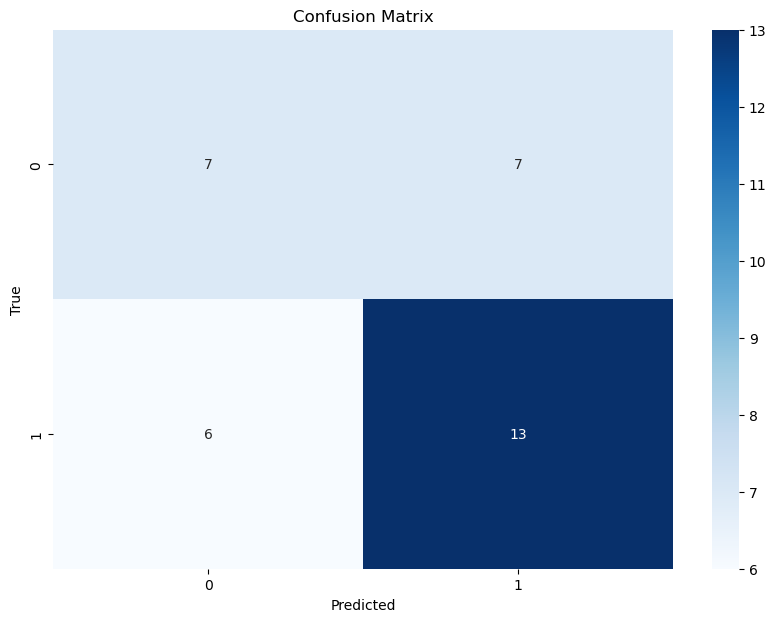

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.svm import SVC

# 모델 생성 및 학습
model = SVC(random_state = 42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6060606060606061


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# 모델 생성 및 학습
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [12]:
import xgboost as xgb

# 모델 생성 및 학습
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5757575757575758
